This is a python-notebook for creating the plots of the evaluation for my bachelor thesis.

In [33]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import textwrap

# Stacked Bar Chart

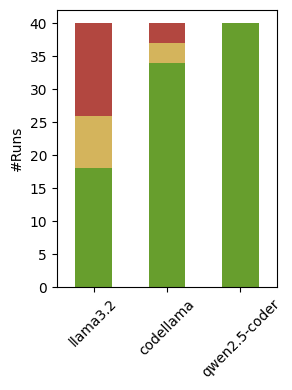

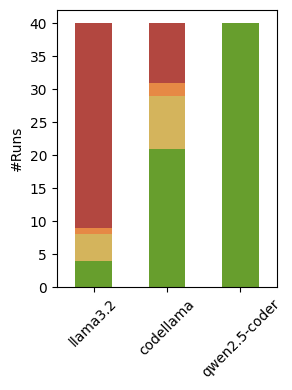

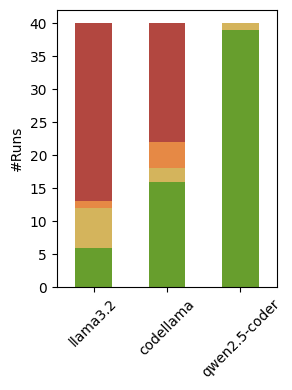

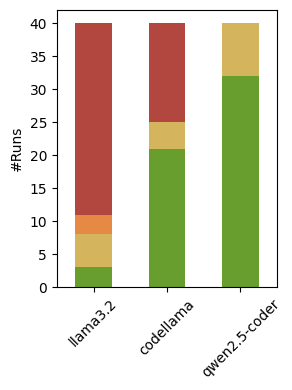

In [34]:
test_case_names = ['image', 'void', 'page_rank', 'connected_components']

# Define the colors for each revision category
category_colors = {
    '0 repair attempts needed': '#679e2d',
    '1 repair attempt needed': '#D4B45C',
    '2 repair attempts needed': '#E68945',
    'Not repaired after 2 revisions': '#b24740'
}


# Loop over each test case and generate a bar chart
for test_case_name in test_case_names:
    # Read the CSV file for each test case
    df = pd.read_csv(f'data/{test_case_name}/code_execution_results.csv', sep=',')

    # Apply the revision categories
    df['Revision Category'] = df['Revisions'].apply(lambda x: '0 repair attempts needed' if x == 0 else 
                                                    '1 repair attempt needed' if x == 1 else
                                                    '2 repair attempts needed' if x == 2 else 
                                                    'Not repaired after 2 attempts')

    # Handle errors (assume these are in the 'Error' column)
    df.loc[df['Error'].notna(), 'Revision Category'] = 'Not repaired after 2 revisions'

    # Count occurrences by model and revision category
    summary = df.groupby(['Model', 'Revision Category']).size().unstack(fill_value=0)

    # Filter for specific models
    summary = summary.loc[['llama3.2', 'codellama', 'qwen2.5-coder'], :]
        
    # Ensure all categories are included in the plot and legend
    for category in category_colors:
        if category not in summary.columns:
            # Add missing categories with zero count
            summary[category] = 0

    # Plot with adjusted colors for each category
    ax = summary.plot(kind='bar', stacked=True, figsize=(3, 4), color=[category_colors[col] for col in summary.columns], legend=False)

    # Add labels and title
    plt.xlabel(None)
    plt.ylabel('#Runs')
    plt.xticks(rotation=45)

    # plt.legend(
    #     title='Revision Category',
    #     bbox_to_anchor=(1, 1),  # Place the legend to the right of the chart
    #     loc='upper left',
    #     fontsize=10
    # )

    # Adjust layout to ensure everything fits
    plt.tight_layout()

    # Save the plot as an image
    plt.savefig(f'../../../testing_of_llms/{test_case_name}_Barchart.png')

    # Show the plot
    plt.show()

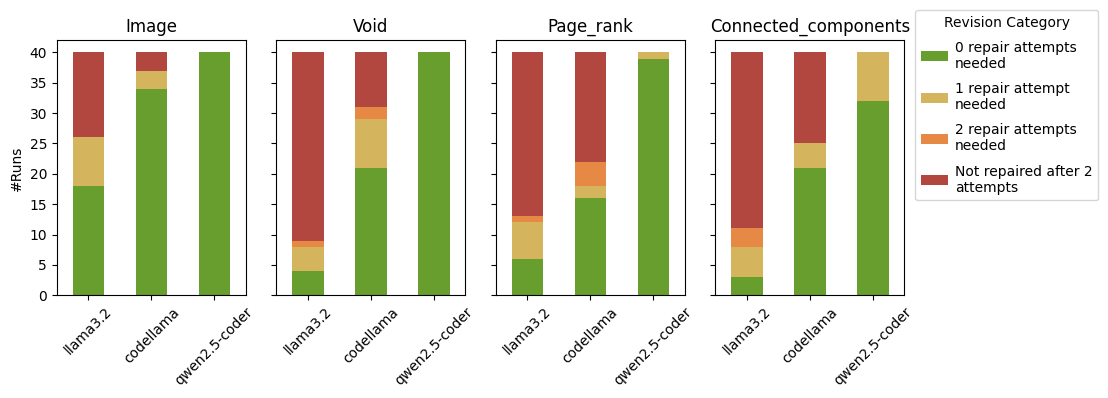

In [75]:
# Define test case names and category colors
test_case_names = ['image', 'void', 'page_rank', 'connected_components']
category_colors = {
    '0 repair attempts needed': '#679e2d',
    '1 repair attempt needed': '#D4B45C',
    '2 repair attempts needed': '#E68945',
    'Not repaired after 2 attempts': '#b24740'
}

# Create a figure with subplots (one subplot per test case)
fig, axes = plt.subplots(1, len(test_case_names), figsize=(11, 4), sharey=True)

# Loop over each test case to generate the bar chart
for idx, test_case_name in enumerate(test_case_names):
    # Read the CSV file for each test case
    df = pd.read_csv(f'data/{test_case_name}/code_execution_results.csv', sep=',')

    # Apply the revision categories
    df['Revision Category'] = df['Revisions'].apply(lambda x: '0 repair attempts needed' if x == 0 else 
                                                    '1 repair attempt needed' if x == 1 else
                                                    '2 repair attempts needed' if x == 2 else 
                                                    'Not repaired after 2 attempts')

    # Handle errors (assume these are in the 'Error' column)
    df.loc[df['Error'].notna(), 'Revision Category'] = 'Not repaired after 2 attempts'

    # Count occurrences by model and revision category
    summary = df.groupby(['Model', 'Revision Category']).size().unstack(fill_value=0)

    # Filter for specific models
    summary = summary.loc[['llama3.2', 'codellama', 'qwen2.5-coder'], :]
        
    # Ensure all categories are included in the plot and legend
    for category in category_colors:
        if category not in summary.columns:
            # Add missing categories with zero count
            summary[category] = 0

    # Plot with adjusted colors for each category
    summary.plot(
        kind='bar', 
        stacked=True, 
        ax=axes[idx], 
        color=[category_colors[col] for col in summary.columns], 
        legend=False
    )

    # Add labels and titles for each subplot
    axes[idx].set_title(test_case_name.capitalize())
    axes[idx].set_xlabel(None)
    axes[idx].set_ylabel('#Runs')
    axes[idx].tick_params(axis='x', rotation=45)

# Add a single legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()

# Function to wrap long labels
def wrap_labels(labels, width):
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]

# Define the desired order of categories
desired_order = [
    '0 repair attempts needed',
    '1 repair attempt needed',
    '2 repair attempts needed',
    'Not repaired after 2 attempts'
]

# Create a mapping of labels to handles
label_to_handle = dict(zip(labels, handles))

# Reorder the handles and labels based on the desired order
ordered_labels = [label for label in desired_order if label in labels]
ordered_handles = [label_to_handle[label] for label in ordered_labels]

# Add the legend with ordered labels
fig.legend(
    ordered_handles,
    wrap_labels(ordered_labels, width=20),  # Wrap the ordered labels
    title='Revision Category',
    bbox_to_anchor=(0.83, 1),  # Position the legend outside the plot
    loc='upper left',
    fontsize=10,
    handletextpad=0.5,
    labelspacing=0.8
)

# Adjust layout to ensure everything fits
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Save the combined plot with proper bounding box
plt.savefig('../../../testing_of_llms/combined_barcharts.png', bbox_inches='tight')

# Show the combined plot
plt.show()

# General Evaluation Function

In [35]:
"""
    General evaluation of the model, including:
    - Time complexity
    - Space complexity (currently not used)
    - Pylint Score
    - and adding everything together
"""
def general_evaluation(df, lowest_time_complexity, lowest_space_complexity):
    time_complexity = df['Code_Execution_Time (s)']
    # space_complexity = df['Memory_Usage (KB)']
    pylint_score = df['Pylint_Score (0-10)']

    # Time complexity score using the ??? function
    time_complexity_score = (lowest_time_complexity / time_complexity)

    # Space complexity score using the ??? function
    # space_complexity_score = (lowest_space_complexity / space_complexity)

    # Pylint score using the max-min function
    PYLINT_MIN = 0
    PYLINT_MAX = 10
    pylint_score_normalized = 1 - (PYLINT_MAX - pylint_score) / (PYLINT_MAX - PYLINT_MIN)

    # Final score (0-1) using the weights
    return (df['accuracy'] * 60 + df['completeness'] * 10 + time_complexity_score * 10 + pylint_score_normalized * 20) / 100

# Boxplot Generation Function

In [36]:
def generate_boxplot(boxplot_data, test_case_name):
    # Create a figure
    plt.figure(figsize=(3, 4))

    # Drop rows with missing values
    boxplot_data = boxplot_data.dropna()

    # List of unique models for plotting
    models = boxplot_data["Model"].unique()

    # Prepare data for boxplot
    total_scores = [boxplot_data[boxplot_data["Model"] == model]["total_score"].values for model in models]

    # Create the boxplot
    plt.boxplot(total_scores, positions=np.arange(len(models)), widths=0.6, patch_artist=True, 
                boxprops=dict(facecolor=('royalblue',0.4), color='royalblue'), 
                whiskerprops=dict(color='black'), 
                capprops=dict(color='black'), 
                medianprops=dict(color='black', linewidth=2),
                showmeans=True, meanprops=dict(marker='o', markerfacecolor='white', markeredgecolor='black', markersize=10),
                )

    # Overlay strip plot using scatter for individual points
    for i, model in enumerate(models):
        y = boxplot_data[boxplot_data["Model"] == model]["total_score"].values
        # Add jitter by adding random noise to x-values
        jittered_x = np.random.normal(i, 0.1, size=len(y))
        plt.scatter(jittered_x, y, color='royalblue', alpha=1, marker='x', linewidths=0.9)

    # Set y-axis limits
    plt.ylim(-0.1, 1.1)

    # Title and labels
    # plt.title("Boxplot for Image Test Case")
    plt.ylabel("Custom Score")
    # plt.xlabel("Model")
    plt.xticks(np.arange(len(models)), models, rotation=45)

    # Show gridlines on y-axis
    # plt.grid(axis="y", linestyle="--", alpha=0.7)

    plt.tight_layout()

    plt.savefig(f'../../../testing_of_llms/{test_case_name}_Boxplot.png')

    # Show the plot
    plt.show()

# Boxplot for Image

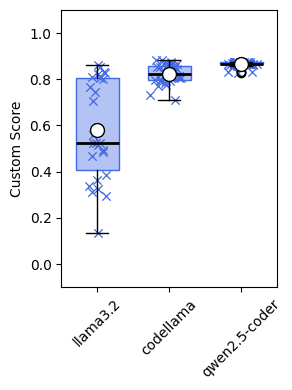

In [37]:
test_case_name='image'

# Read data
df = pd.read_csv('data/image/code_execution_results.csv', sep=',')

# Define correctness criteria
correct_file_formats = {"JPEG", "jpeg", "jpg", "JPG", ".jpg", ".JPG", ".JPEG", ".jpeg"}
correct_dimensions = {"(1920, 1281)", "1920x1281", "(1920x1281)", "1920, 1281", "(1920,1281)", "1920 x 1281", "(1920 x 1281)", "1920,1281"}
correct_aspect_ratio = 1.4988290398126465
aspect_ratio_tolerance = 0.01

# Add a correctness column for aspect ratio with tolerance
def is_correct_aspect_ratio(x):
    try:
        # Try converting to float
        value = float(x)
        return abs(value - correct_aspect_ratio) <= aspect_ratio_tolerance
    except ValueError:
        # If conversion fails (i.e., non-numeric values), return False
        return False

# Add correctness columns
df["file_format_correct"] = df["file_format"].isin(correct_file_formats)
df["dimensions_correct"] = df["dimensions"].isin(correct_dimensions)
df["aspect_ratio_correct"] = df["aspect_ratio"].apply(is_correct_aspect_ratio)

# Filter rows with errors so that only running code is evaluated
df = df[df[["Error"]].isna().all(axis=1)]

# # Calculate precision, recall, and F1-score
df["correct_count"] = (
    df["file_format_correct"].astype(int)
    + df["dimensions_correct"].astype(int)
    + df["aspect_ratio_correct"].astype(int)
)
df["accuracy"] = df["correct_count"] / 3  # 3 fields to evaluate
df["completeness"] = df["correct_count"].apply(lambda x: 1 if x == 3 else 0)

# Calculate the general evaluation score
df["total_score"] = general_evaluation(df, 0.03 , 80)

# Prepare boxplot data
boxplot_data = df[["Model", "total_score"]]

# Generate boxplot
generate_boxplot(boxplot_data, test_case_name)

# Boxplot for VoID

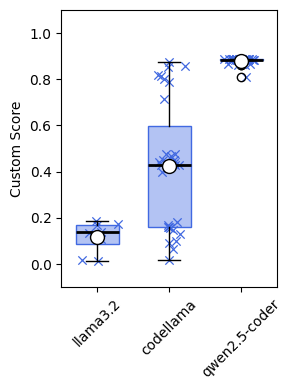

In [38]:
test_case_name='void'

# Read data
df = pd.read_csv('data/void/code_execution_results.csv', sep=',')

# Define correctness criteria
correct_predicate_count = {5}
correct_class_count = {3}

# Add correctness columns
df["predicate_count_correct"] = df["predicate_count"].isin(correct_predicate_count)
df["class_count_correct"] = df["class_count"].isin(correct_class_count)

# Filter rows with errors so that only running code is evaluated
df = df[df[["Error"]].isna().all(axis=1)]

# Calculate precision, recall, and F1-score
df["correct_count"] = (
    df["predicate_count_correct"].astype(int)
    + df["class_count_correct"].astype(int)
)
df["accuracy"] = df["correct_count"] / 2  # 2 fields to evaluate
df["completeness"] = df["correct_count"].apply(lambda x: 1 if x == 2 else 0)

# Calculate the general evaluation score
df["total_score"] = general_evaluation(df, 0.03 , 80)

# Prepare boxplot data
boxplot_data = df[["Model", "total_score"]]

# Generate boxplot
generate_boxplot(boxplot_data, test_case_name)

# Boxplot Page Rank

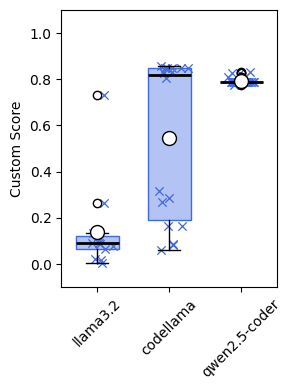

In [39]:
test_case_name='page_rank'

# Read data
df = pd.read_csv('data/page_rank/code_execution_results.csv', sep=',')

# Correctness criteria
correct_page_rank = {
    'A': 0.143,
    'B': 0.143,
    'C': 0.206,
    'D': 0.102,
    'E': 0.021,
    'F': 0.189,
    'G': 0.196,
}
tolerance = 0.01

# Function to check if the value is within the tolerance of the correct value
def is_correct_page_rank(x, correct_value):
    try:
        # Try converting to float
        value = float(x)
        return abs(value - correct_value) <= tolerance
    except ValueError:
        # If conversion fails (i.e., non-numeric values), return False
        return False

# Add correctness columns for each page rank
df["page_rank_a_correct"] = df["A"].apply(lambda x: is_correct_page_rank(x, correct_page_rank['A']))
df["page_rank_b_correct"] = df["B"].apply(lambda x: is_correct_page_rank(x, correct_page_rank['B']))
df["page_rank_c_correct"] = df["C"].apply(lambda x: is_correct_page_rank(x, correct_page_rank['C']))
df["page_rank_d_correct"] = df["D"].apply(lambda x: is_correct_page_rank(x, correct_page_rank['D']))
df["page_rank_e_correct"] = df["E"].apply(lambda x: is_correct_page_rank(x, correct_page_rank['E']))
df["page_rank_f_correct"] = df["F"].apply(lambda x: is_correct_page_rank(x, correct_page_rank['F']))
df["page_rank_g_correct"] = df["G"].apply(lambda x: is_correct_page_rank(x, correct_page_rank['G']))

# Filter rows with errors so that only running code is evaluated
df = df[df[["Error"]].isna().all(axis=1)]

# Calculate precision, recall, and F1-score
df["correct_count"] = (
    df["page_rank_a_correct"].astype(int)
    + df["page_rank_b_correct"].astype(int)
    + df["page_rank_c_correct"].astype(int)
    + df["page_rank_d_correct"].astype(int)
    + df["page_rank_e_correct"].astype(int)
    + df["page_rank_f_correct"].astype(int)
    + df["page_rank_g_correct"].astype(int)
)
df["accuracy"] = df["correct_count"] / 7  # 7 fields to evaluate
df["completeness"] = df["correct_count"].apply(lambda x: 1 if x == 7 else 0)

# Calculate the general evaluation score
df["total_score"] = general_evaluation(df, 0.03 , 80)

# Prepare boxplot data
boxplot_data = df[["Model", "total_score"]]

# Generate boxplot
generate_boxplot(boxplot_data, test_case_name)

# Boxplot Connected Components

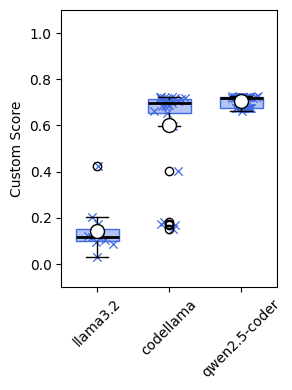

In [40]:
test_case_name='connected_components'

# Read data
df = pd.read_csv('data/connected_components/code_execution_results.csv', sep=',')

# Correctness criteria
correct_scc_count = {4}
correct_wcc_count = {2}
correct_strongly_connected_components = [
    {'A', 'B'},
    {'C', 'D', 'E'},
    {'F'},
    {'G'},
    {'0', '1'},
    {'2', '3', '4'},
    {'5'},
    {'6'}
]
correct_weakly_connected_components = [
    {'A', 'B'},
    {'C', 'D', 'E', 'F', 'G'},
    {'0', '1'},
    {'2', '3', '4', '5', '6'}
]

def check_connected_components(x, correct_components):
    try:
        # Try converting to set
        components = set(x.split(", "))
        return components in correct_components
    except AttributeError:
        # If conversion fails (i.e., non-string values), return False
        return False

# Add correctness columns for each page rank
df["scc_count_correct"] = df["strongly connected components count"].isin(correct_scc_count)
df["wcc_count_correct"] = df["weakly connected components count"].isin(correct_wcc_count)
df["scc_1_correct"] = df["strongly connected component 1"].apply(lambda x: check_connected_components(x, correct_strongly_connected_components))
df["scc_2_correct"] = df["strongly connected component 2"].apply(lambda x: check_connected_components(x, correct_strongly_connected_components))
df["scc_3_correct"] = df["strongly connected component 3"].apply(lambda x: check_connected_components(x, correct_strongly_connected_components))
df["scc_4_correct"] = df["strongly connected component 4"].apply(lambda x: check_connected_components(x, correct_strongly_connected_components))
df["wcc_1_correct"] = df["weakly connected component 1"].apply(lambda x: check_connected_components(x, correct_weakly_connected_components))
df["wcc_2_correct"] = df["weakly connected component 2"].apply(lambda x: check_connected_components(x, correct_weakly_connected_components))


# Filter rows with errors so that only running code is evaluated
df = df[df[["Error"]].isna().all(axis=1)]

# Calculate precision, recall, and F1-score
df["correct_count"] = (
    df["scc_count_correct"].astype(int)
    + df["wcc_count_correct"].astype(int)
    + df["scc_1_correct"].astype(int)
    + df["scc_2_correct"].astype(int)
    + df["scc_3_correct"].astype(int)
    + df["scc_4_correct"].astype(int)
    + df["wcc_1_correct"].astype(int)
    + df["wcc_2_correct"].astype(int)
)
df["accuracy"] = df["correct_count"] / 8  # 8 fields to evaluate
df["completeness"] = df["correct_count"].apply(lambda x: 1 if x == 8 else 0)

# Calculate the general evaluation score
df["total_score"] = general_evaluation(df, 0.03 , 80)

# Prepare boxplot data
boxplot_data = df[["Model", "total_score"]]

# Generate boxplot
generate_boxplot(boxplot_data, test_case_name)